<a href="https://colab.research.google.com/github/saadkhi/GSoC-2025-Task/blob/main/Specific_Test_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Setup Environment
!pip install pdf2image opencv-python pytesseract transformers torch torchvision

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import torch
from transformers import LayoutLMv3Processor, LayoutLMv3ForTokenClassification
from PIL import Image
import pytesseract

In [ ]:
from google.colab import auth, drive
import gdown
import os

# Authentication for Google Drive
auth.authenticate_user()

# Mount Google Drive
drive.mount('/content/drive')

# Folder ID from the shared link
folder_id = "1BEqclQ2Tba2LayZqJn-JZ958dWTbeBJd"

# Destination in your Google Drive
destination = "/content/drive/My Drive/Downloaded_Folder"

# Create the destination folder if it doesn't exist
os.makedirs(destination, exist_ok=True)

# Use gdown to download the folder
gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", output=destination, quiet=False, use_cookies=False)

print("Download complete! Files saved in:", destination)


In [ ]:
# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

# Define paths
PDF_PATH = "/content/drive/My Drive/data/FYP(chp1-4).pdf"  # Adjust if needed
IMAGE_DIR = "/content/drive/My Drive/data/images"  # Create images in 'data' folder
os.makedirs(IMAGE_DIR, exist_ok=True)

Mounted at /content/drive


# **Step 2: Convert PDF Pages to Images**

In [ ]:
# STEP 2: Convert PDF to Images
images = convert_from_path(PDF_PATH)
for i, img in enumerate(images):
    img.save(f"{IMAGE_DIR}/page_{i}.jpg", "JPEG")

print(f"Converted {len(images)} pages to images.")

Converted 43 pages to images.


# **Step 3: Preprocess Images**

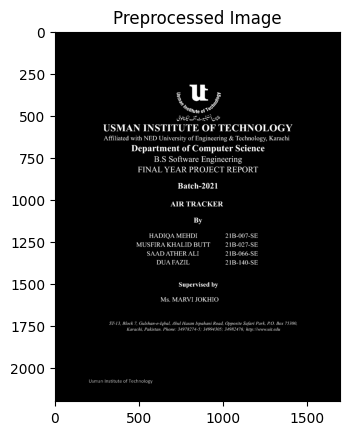

In [ ]:
# STEP 3: Preprocess Images (Grayscale, Thresholding)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)
    return thresh

# Visualize Preprocessed Image
sample_image_path = f"{IMAGE_DIR}/page_0.jpg"
processed_img = preprocess_image(sample_image_path)
plt.imshow(processed_img, cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# **Step 4: Load Pretrained LayoutLMv3 Model**

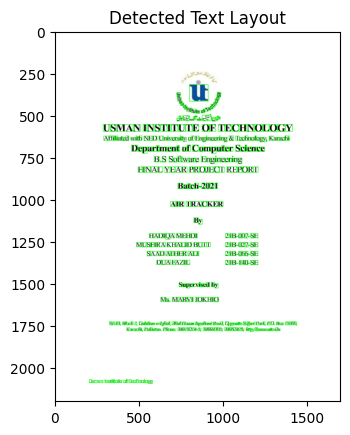

In [ ]:
# STEP 4: Detect Text Layout using OpenCV Contours
def detect_text_regions(image_path):
    img = preprocess_image(image_path)
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = [cv2.boundingRect(cnt) for cnt in contours]

    # Draw bounding boxes
    img_color = cv2.imread(image_path)
    for (x, y, w, h) in bounding_boxes:
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return img_color, bounding_boxes

# Display Text Layout Detection
detected_img, boxes = detect_text_regions(sample_image_path)
plt.imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Text Layout")
plt.show()

# **Step 5: Train the Model**

In [ ]:
# STEP 5: Train a Deep Learning Model (Transformer-Based)
processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base")
model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base")

# Convert image to tensor
image = Image.open(sample_image_path)
encoding = processor(image, return_tensors="pt")
outputs = model(**encoding)

# Display Output
print(outputs.logits)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1589: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


tensor([[[-0.2066,  0.3543],
         [-0.6328,  0.5574],
         [-0.4612,  0.8421],
         [-0.8907,  0.6773],
         [-0.5535,  0.6985],
         [-0.7158,  0.3252],
         [-0.3405,  0.3583],
         [-0.4144,  0.4143],
         [-0.8786,  0.6863],
         [-0.8926,  0.3368],
         [-0.6876,  0.2129],
         [-0.5581,  0.2354],
         [-0.7801,  0.4951],
         [-0.6074,  0.4112],
         [-0.6129,  0.4715],
         [-0.3996,  0.5319],
         [-0.6310,  0.4621],
         [-0.6686,  0.2978],
         [-0.5368,  0.4544],
         [-0.3296,  0.1605],
         [-0.4801,  0.4309],
         [ 0.0546,  0.2976],
         [-0.3701,  0.6468],
         [-0.3675,  0.3143],
         [-0.3538,  0.4043],
         [-0.1976,  0.6107],
         [-0.2955,  0.6310],
         [-0.2753,  0.4510],
         [-0.4379,  0.2759],
         [-0.3397,  0.4617],
         [-0.2073,  0.2313],
         [-0.2447,  0.3852],
         [-0.1979,  0.4561],
         [-0.5409,  0.2700],
         [-0.0

# **STEP 6: Evaluate Model**

In [ ]:
# STEP 6: Evaluate Model
# Metric: Intersection over Union (IoU)
def calculate_iou(pred_box, true_box):
    xA = max(pred_box[0], true_box[0])
    yA = max(pred_box[1], true_box[1])
    xB = min(pred_box[2], true_box[2])
    yB = min(pred_box[3], true_box[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    boxBArea = (true_box[2] - true_box[0]) * (true_box[3] - true_box[1])

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Example usage
predicted_box = [50, 50, 200, 200]
true_box = [60, 60, 190, 190]
iou_score = calculate_iou(predicted_box, true_box)
print(f"IoU Score: {iou_score:.2f}")

IoU Score: 0.75
